In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [32]:
import numpy as np
import pandas as pd

# Generate the base feature X1
# np.random.seed(42)  # Set seed for reproducibility
x1 = np.random.normal(loc=3, scale=1, size=100)

# Generate nonlinear relationships for the other features
x2 = 2 * np.sin(x1) + 5 + np.random.normal(scale=0.5, size=100)
x3 = np.log1p(x1) + np.random.normal(scale=0.1, size=100)
x4 = np.exp(0.1 * x1) + np.random.normal(scale=0.3, size=100)
x5 = (x1**2) - 3 * x1 + np.random.normal(scale=1, size=100)
x6 = np.sqrt(np.abs(x1)) + np.random.normal(scale=0.2, size=100)
x7 = np.tanh(x1) + np.random.normal(scale=0.05, size=100)
x8 = np.cos(2 * x1) + np.random.normal(scale=0.4, size=100)
x9 = np.abs(x1 - 3) + np.random.normal(scale=0.2, size=100)
x10 = (x1**3) - (x1**2) + np.random.normal(scale=2, size=100)

# Create a DataFrame
training_data = pd.DataFrame({
    'X1': x1,
    'X2': x2,
    'X3': x3,
    'X4': x4,
    'X5': x5,
    'X6': x6,
    'X7': x7,
    'X8': x8,
    'X9': x9,
    'X10': x10
})

# Display the first few rows of the dataset
print(training_data.head())


         X1        X2        X3        X4        X5        X6        X7  \
0  1.092192  6.421831  0.756730  1.216973 -1.592264  1.281208  0.756480   
1  2.139615  7.112854  1.186645  0.957197 -1.271132  1.337280  0.936716   
2  2.586394  6.878964  1.299376  1.360154 -0.874265  1.617272  1.091217   
3  4.887688  3.565956  1.900750  1.322582  9.127582  2.221051  0.999920   
4  3.556553  3.828891  1.421335  1.757362  2.415386  1.785526  1.037479   

         X8        X9        X10  
0 -0.149736  1.630099  -1.002263  
1  0.161307  0.540331   4.956982  
2  0.077778  0.170149  13.950224  
3 -1.273936  1.919580  90.989762  
4  0.618784  0.377996  35.567577  


<Axes: >

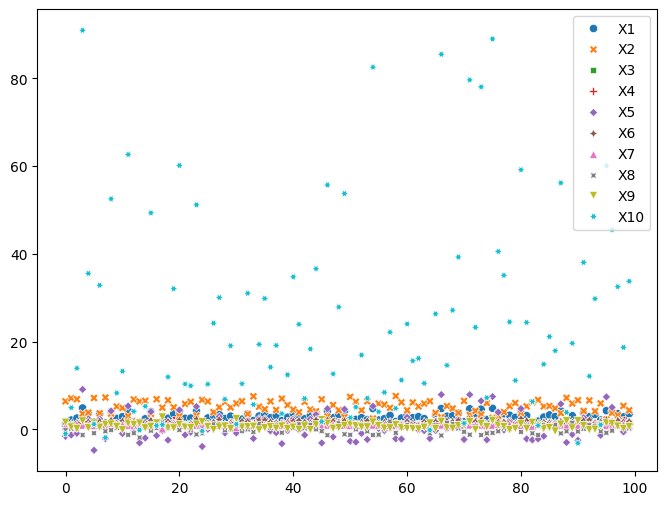

In [37]:
plt.figure(figsize=(8,6))
sns.scatterplot(data = training_data)


In [38]:
sigma = training_data.cov()

In [39]:
sigma

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
X1,1.044004,-1.203810,0.299223,0.132236,2.605678,0.330011,0.066534,-0.047172,-0.124013,20.906783
X2,-1.203810,1.930947,-0.302301,-0.171429,-3.508425,-0.379478,-0.032211,0.012261,-0.039991,-27.167002
X3,0.299223,-0.302301,0.101995,0.036304,0.662529,0.093267,0.025095,-0.006174,-0.071094,5.371298
X4,0.132236,-0.171429,0.036304,0.120707,0.289507,0.050417,0.009316,-0.006886,-0.019910,2.728210
X5,2.605678,-3.508425,0.662529,0.289507,8.810877,0.842186,0.080354,-0.490434,0.326922,62.539231
X6,0.330011,-0.379478,0.093267,0.050417,0.842186,0.154925,0.022383,0.001386,-0.050129,6.512258
X7,0.066534,-0.032211,0.025095,0.009316,0.080354,0.022383,0.013248,-0.008316,-0.042994,0.767861
X8,-0.047172,0.012261,-0.006174,-0.006886,-0.490434,0.001386,-0.008316,0.727409,-0.313039,-5.225707
X9,-0.124013,-0.039991,-0.071094,-0.019910,0.326922,-0.050129,-0.042994,-0.313039,0.410580,3.105460
X10,20.906783,-27.167002,5.371298,2.728210,62.539231,6.512258,0.767861,-5.225707,3.105460,515.533833


In [40]:
factorize_sigma = np.linalg.svd(sigma)
factorize_sigma

SVDResult(U=array([[-4.01993601e-02,  1.84884138e-01, -2.60424141e-01,
         3.53363179e-01,  2.76488878e-01,  1.00194142e-01,
        -6.66002338e-03, -6.26943315e-01,  5.24579797e-01,
        -1.29400121e-01],
       [ 5.22876149e-02, -3.48000565e-01,  2.23767650e-01,
         6.90150442e-01, -5.81599585e-01, -8.49434945e-02,
        -8.22149804e-03, -3.82888560e-02,  4.18668230e-02,
        -3.19700371e-02],
       [-1.03281591e-02,  5.65009976e-02, -1.03516407e-01,
         1.99168007e-01,  1.25099648e-01,  5.99718912e-02,
        -4.27358081e-02, -4.61083598e-01, -8.43517728e-01,
        -3.35303315e-02],
       [-5.23644730e-03,  8.53717934e-04, -7.96372771e-02,
         6.29349614e-03,  1.24826788e-01, -9.75631042e-01,
        -1.50102005e-01, -5.98380922e-02,  1.09336986e-03,
        -6.33122939e-03],
       [-1.20439036e-01,  7.60224770e-01,  6.16765548e-01,
         1.39284692e-01, -5.72009282e-02, -5.00670472e-02,
        -4.05991556e-02,  1.28269875e-02, -7.80144838e-03,

In [43]:
factorize_sigma = np.linalg.svd(training_data - training_data.mean(), full_matrices=False)
Q_transpose = factorize_sigma[0]
Q = Q_transpose.T

# Step 2: Convert the training data and its centered version to numpy arrays
X_transpose = np.array(training_data)
X_bar_transpose = np.array(training_data - training_data.mean())
X_bar = X_bar_transpose.T  # X_bar is now the mean-centered data

# Step 3: Calculate the covariance matrix (sigma)
n_train = training_data.shape[0]  # Number of training samples
sigma = (1 / n_train) * np.matmul(X_bar, X_bar_transpose)

# Display results
print("Covariance Matrix (sigma):\n", sigma)

Covariance Matrix (sigma):
 [[ 1.03356379e+00 -1.19177212e+00  2.96231195e-01  1.30913833e-01
   2.57962133e+00  3.26710819e-01  6.58685497e-02 -4.67006757e-02
  -1.22772545e-01  2.06977148e+01]
 [-1.19177212e+00  1.91163784e+00 -2.99277636e-01 -1.69714675e-01
  -3.47334061e+00 -3.75683393e-01 -3.18886748e-02  1.21381403e-02
  -3.95910573e-02 -2.68953324e+01]
 [ 2.96231195e-01 -2.99277636e-01  1.00975335e-01  3.59407706e-02
   6.55903982e-01  9.23342460e-02  2.48436865e-02 -6.11247568e-03
  -7.03830903e-02  5.31758505e+00]
 [ 1.30913833e-01 -1.69714675e-01  3.59407706e-02  1.19500169e-01
   2.86611450e-01  4.99127850e-02  9.22238895e-03 -6.81756736e-03
  -1.97109861e-02  2.70092818e+00]
 [ 2.57962133e+00 -3.47334061e+00  6.55903982e-01  2.86611450e-01
   8.72276864e+00  8.33764229e-01  7.95502020e-02 -4.85529382e-01
   3.23652508e-01  6.19138387e+01]
 [ 3.26710819e-01 -3.75683393e-01  9.23342460e-02  4.99127850e-02
   8.33764229e-01  1.53375301e-01  2.21594950e-02  1.37233089e-03
  -4.

In [46]:
z = np.matmul(Q.T, X_bar)
z


array([[ 0.39412552,  0.15287394,  0.0252555 , ..., -0.22189047,
        -0.08950293, -0.14135335],
       [ 2.35125588,  1.67297182,  0.93345481, ..., -0.80284335,
         0.60776086, -0.97594801],
       [-1.51515549, -1.29558865, -0.63139982, ...,  0.58954917,
        -0.18483902,  0.60701972],
       ...,
       [-3.36569261, -2.27566196, -1.16002844, ...,  1.04348988,
        -0.75710073,  1.36378202],
       [-1.33769709, -0.97161732, -0.49862367, ...,  0.38539404,
        -0.28648706,  0.53406255],
       [ 1.28395023,  0.99765631,  0.4952651 , ..., -0.38592293,
         0.2679471 , -0.50721171]], shape=(100, 100))

In [51]:
projected_training_data = pd.DataFrame(data=z.T[:, :2], columns = ["z1", "z2"])
projected_training_data

,z1,z2
0,0.394126,2.351256
1,0.152874,1.672972
2,0.025256,0.933455
3,-0.284641,-6.376185
4,-0.220670,-1.129891
...,...,...
95,-0.225653,-3.665144
96,-0.269495,-2.235876
97,-0.221890,-0.802843
98,-0.089503,0.607761


In [52]:
eig_val  = factorize_sigma[1]
total  = np.sum(eig_val)

In [53]:
total

np.float64(269.31939317220093)